### Import packages

In [ ]:
!pip install pandas -q
!pip install numpy -q
!pip install matplotlib -q
!pip install seaborn -q
!pip install sklearn -q

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, balanced_accuracy_score

In [55]:
df = pd.read_csv("../data/pokemon.csv")

In [8]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [9]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [56]:
df = df[[
    "name",
    "hp",
    "attack",
    "defense",
    "sp_attack",
    "sp_defense",
    "speed",
    "base_total",
    "weight_kg",
    "height_m",
    "experience_growth",
    "base_egg_steps",
    "base_happiness",
    "capture_rate",
    "percentage_male",
    "is_legendary",
    "type1",
    "type2"
    ]]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               801 non-null    object 
 1   hp                 801 non-null    int64  
 2   attack             801 non-null    int64  
 3   defense            801 non-null    int64  
 4   sp_attack          801 non-null    int64  
 5   sp_defense         801 non-null    int64  
 6   speed              801 non-null    int64  
 7   base_total         801 non-null    int64  
 8   weight_kg          781 non-null    float64
 9   height_m           781 non-null    float64
 10  experience_growth  801 non-null    int64  
 11  base_egg_steps     801 non-null    int64  
 12  base_happiness     801 non-null    int64  
 13  capture_rate       801 non-null    object 
 14  percentage_male    703 non-null    float64
 15  is_legendary       801 non-null    int64  
 16  type1              801 non

In [40]:
df.isnull().sum()[df.isnull().sum() > 0]

weight_kg           20
height_m            20
percentage_male     98
type2              384
dtype: int64

In [57]:
df[df['percentage_male'].isnull()][["name", "percentage_male"]].head(20)

,name,percentage_male
80,Magnemite,NaN
81,Magneton,NaN
99,Voltorb,NaN
100,Electrode,NaN
119,Staryu,NaN
120,Starmie,NaN
131,Ditto,NaN
136,Porygon,NaN
143,Articuno,NaN
144,Zapdos,NaN


In [58]:
df["percentage_male"] = df["percentage_male"].fillna(0)

In [42]:
df.isnull().sum()[df.isnull().sum() > 0]

weight_kg     20
height_m      20
type2        384
dtype: int64

In [59]:
df["weight_kg"] = df["weight_kg"].fillna(0)
df["height_m"] = df["height_m"].fillna(0)
df["type2"] = df["type2"].fillna("None")

In [44]:
df.isnull().sum()

name                 0
hp                   0
attack               0
defense              0
sp_attack            0
sp_defense           0
speed                0
base_total           0
weight_kg            0
height_m             0
experience_growth    0
base_egg_steps       0
base_happiness       0
capture_rate         0
percentage_male      0
is_legendary         0
type1                0
type2                0
dtype: int64

---
For simplification and introduction, we will stick to only single type pokemon

In [60]:
le = LabelEncoder()
df['type'] = le.fit_transform(df["type1"])

In [61]:
df[["type1", "type"]]

,type1,type
0,grass,9
1,grass,9
2,grass,9
3,fire,6
4,fire,6
...,...,...
796,steel,16
797,grass,9
798,dark,1
799,psychic,14


In [70]:
names = df[["name"]].copy()

In [80]:
names.iloc[2:22]

,name
2,Venusaur
3,Charmander
4,Charmeleon
5,Charizard
6,Squirtle
7,Wartortle
8,Blastoise
9,Caterpie
10,Metapod
11,Butterfree


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               801 non-null    object 
 1   hp                 801 non-null    int64  
 2   attack             801 non-null    int64  
 3   defense            801 non-null    int64  
 4   sp_attack          801 non-null    int64  
 5   sp_defense         801 non-null    int64  
 6   speed              801 non-null    int64  
 7   base_total         801 non-null    int64  
 8   weight_kg          801 non-null    float64
 9   height_m           801 non-null    float64
 10  experience_growth  801 non-null    int64  
 11  base_egg_steps     801 non-null    int64  
 12  base_happiness     801 non-null    int64  
 13  capture_rate       801 non-null    object 
 14  percentage_male    801 non-null    float64
 15  is_legendary       801 non-null    int64  
 16  type1              801 non

In [102]:
df[~df["capture_rate"].apply(lambda x: isinstance(x, (int, float)))]["capture_rate"].unique()


array(['45', '255', '120', '127', '90', '190', '75', '235', '150', '25',
       '170', '50', '200', '100', '180', '60', '225', '30', '35', '3',
       '65', '70', '125', '205', '155', '145', '130', '140', '15', '220',
       '160', '80', '55', '30 (Meteorite)255 (Core)'], dtype=object)

In [100]:
df[pd.to_numeric(df["capture_rate"], errors='coerce').isna()]["capture_rate"].unique()

array(['30 (Meteorite)255 (Core)'], dtype=object)

In [108]:
df.index[df["capture_rate"] == '30 (Meteorite)255 (Core)']

Index([773], dtype='int64')

In [109]:
df.loc[df["capture_rate"] == '30 (Meteorite)255 (Core)', "capture_rate"] = 30

In [111]:
df["capture_rate"] = df["capture_rate"].astype(float)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               801 non-null    object 
 1   hp                 801 non-null    int64  
 2   attack             801 non-null    int64  
 3   defense            801 non-null    int64  
 4   sp_attack          801 non-null    int64  
 5   sp_defense         801 non-null    int64  
 6   speed              801 non-null    int64  
 7   base_total         801 non-null    int64  
 8   weight_kg          801 non-null    float64
 9   height_m           801 non-null    float64
 10  experience_growth  801 non-null    int64  
 11  base_egg_steps     801 non-null    int64  
 12  base_happiness     801 non-null    int64  
 13  capture_rate       801 non-null    float64
 14  percentage_male    801 non-null    float64
 15  is_legendary       801 non-null    int64  
 16  type1              801 non

In [123]:
features = [
    "hp",
    "attack",
    "defense",
    "sp_attack",
    "sp_defense",
    "speed"
]

In [124]:
X = df[features]
y = df["type"]

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [126]:
X_train.head()

,hp,attack,defense,sp_attack,sp_defense,speed
760,42,30,38,30,38,32
768,55,55,80,70,45,15
509,64,88,50,88,50,106
411,40,29,45,29,45,36
4,58,64,58,80,65,80


In [127]:
y_train.head()

760    9
768    8
509    1
411    0
4      6
Name: type, dtype: int64

In [128]:
rand_forest = RandomForestClassifier(n_estimators=100)
rand_forest.fit(X_train, y_train)

RandomForestClassifier()

In [129]:
y_pred = rand_forest.predict(X_test)

In [132]:
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

         bug       0.29      0.29      0.29        14
        dark       0.00      0.00      0.00         6
      dragon       0.25      0.20      0.22         5
    electric       0.33      0.12      0.18         8
       fairy       0.00      0.00      0.00         4
    fighting       0.20      0.17      0.18         6
        fire       0.10      0.10      0.10        10
      flying       0.00      0.00      0.00         1
       ghost       0.00      0.00      0.00         5
       grass       0.14      0.19      0.16        16
      ground       0.25      0.17      0.20         6
         ice       0.00      0.00      0.00         5
      normal       0.29      0.48      0.36        21
      poison       0.00      0.00      0.00         6
     psychic       0.44      0.36      0.40        11
        rock       0.08      0.11      0.10         9
       steel       0.00      0.00      0.00         5
       water       0.17    

/home/bede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [133]:
y.value_counts()

type
17    114
12    105
9      78
0      72
14     53
6      52
15     45
3      39
13     32
10     32
1      29
5      28
2      27
8      27
16     24
11     23
4      18
7       3
Name: count, dtype: int64

In [134]:
y_test.value_counts()

type
17    23
12    21
9     16
0     14
14    11
6     10
15     9
3      8
1      6
5      6
10     6
13     6
11     5
2      5
16     5
8      5
4      4
7      1
Name: count, dtype: int64

In [135]:
sc = StandardScaler()

In [145]:
X_train_sc = sc.fit_transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=features)

X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=features)


In [146]:
X_train_sc.head()

,hp,attack,defense,sp_attack,sp_defense,speed
0,-1.066518,-1.525136,-1.198092,-1.286555,-1.200583,-1.214491
1,-0.551997,-0.741105,0.276483,-0.070359,-0.946707,-1.792794
2,-0.195790,0.293816,-0.776785,0.476929,-0.765367,1.302831
3,-1.145675,-1.556498,-0.952330,-1.316959,-0.946707,-1.078419
4,-0.433261,-0.458854,-0.495914,0.233690,-0.221348,0.418367


In [147]:
rand_forest.fit(X_train_sc,y_train)

RandomForestClassifier()

In [148]:
rand_forest.score(X_test_sc,y_test)

0.18012422360248448

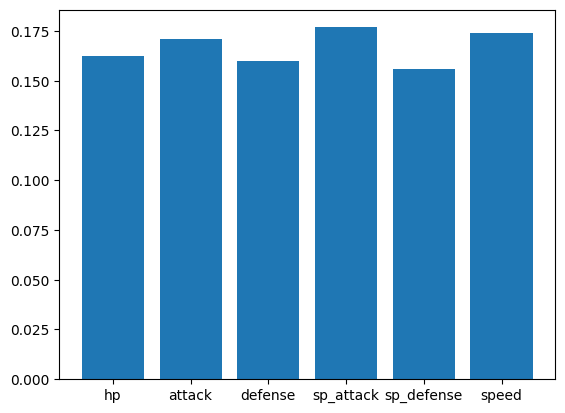

In [ ]:
importances = rand_forest.feature_importances_
plt.bar(features, importances)
plt.show()

In [155]:
et = ExtraTreesClassifier(n_estimators=100)

In [156]:
et.fit(X_train_sc,y_train)
et.score(X_test_sc, y_test)

0.16770186335403728

---

These models haven't worked amazingly at this point, to demonstrate another model heres one that is likely to be successful

## Legendary Pokemon Classifier

In [159]:
df_experiment_2 = pd.read_csv("../data/pokemon.csv")

In [161]:
df_experiment_2 = df_experiment_2[["name", "base_total", "experience_growth", "capture_rate", "is_legendary"]]

In [163]:
df_experiment_2.head()

,name,base_total,experience_growth,capture_rate,is_legendary
0,Bulbasaur,318,1059860,45,0
1,Ivysaur,405,1059860,45,0
2,Venusaur,625,1059860,45,0
3,Charmander,309,1059860,45,0
4,Charmeleon,405,1059860,45,0


In [164]:
df_experiment_2.loc[df_experiment_2["capture_rate"] == '30 (Meteorite)255 (Core)', "capture_rate"] = 30

In [165]:
df_experiment_2.isnull().sum()

name                 0
base_total           0
experience_growth    0
capture_rate         0
is_legendary         0
dtype: int64

In [190]:
features_ex_2 = ["base_total", "experience_growth", "capture_rate"]

In [191]:
X = df_experiment_2[features_ex_2]
y = df_experiment_2["is_legendary"]

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y)

In [169]:
logr = LogisticRegression()

In [170]:
logr.fit(X_train, y_train)
logr.score(X_test, y_test)

0.9751552795031055

---
This score is the accuracy of the model, it looks amazing - 97% accuracy!

However if we think about what this is telling us we may be able to spot some issue with this...

This basically means "if i pick a random pokemon from the test split, i will accuracy predict whether its a legendary or not a legendary!"

Now, lets think - if our model picked "not a legendary" 100% of the time, and our test split was 97% not_legendary, wed get an accuracy score of 97%

In [174]:
y_pred = logr.predict(X_test)

In [175]:
balanced_accuracy_score(y_test, y_pred)

0.8894557823129252

This tells us the average of 2 accuracy scores, for class 0 "not_legendary" and class 1 "legendary"

In [228]:
new_pokemon = {
    "name": "crazy_poke",
    "base_total": 1150,
    "experience_growth": 1059860,
    "capture_rate": 45,
    "is_legendary": 1
}

In [229]:
test_pokemon = pd.DataFrame(data=[new_pokemon], columns=features_ex_2)

In [230]:
test_pokemon

,base_total,experience_growth,capture_rate
0,1150,1059860,45


In [231]:
logr.predict_proba(test_pokemon)

array([[0.4013878, 0.5986122]])

In [212]:
df_experiment_2["is_legendary"].value_counts()

is_legendary
0    731
1     70
Name: count, dtype: int64

In [233]:
y_test.value_counts(normalize=True)

is_legendary
0    0.913043
1    0.086957
Name: proportion, dtype: float64

Here we can see our class imbalance, 91% not legendary, 9% legendary

---

There are many ways to deal with this issue, which is very common in Data Science such as:
- Oversampling the minority class
- downsampling the majority
- generating new data to balance the classes which is similar to other data points (augmentation)